<a href="https://colab.research.google.com/github/sakethakella/machinelearning/blob/main/sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing, cleaning, Model Implementation
Importing Important Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file and dividing the independent and dependent variables

In [92]:
df=pd.read_csv('advertising_sales_data.csv')
X=df.iloc[:,1:-1].values
Y=df.iloc[:,-1].values
C=df.iloc[:,2:-1].values

Data Cleaning process. In this process the missing values of data are filled with the mean value

In [93]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,:])
X[:,:]=imputer.transform(X[:,:])
imputer.fit(C[:,:])
C[:,:]=imputer.transform(C[:,:])

The data is split into training and testing sets

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)
c_train,c_test,y1_train,y1_test=train_test_split(C,Y,random_state=1,test_size=0.2)

Feature Scaling. The data is featured scaled by using the methods like standardising and normalising

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
sc=StandardScaler()
n=Normalizer()
a_train=sc.fit_transform(x_train)
a_test=sc.transform(x_test)
b_train=n.fit_transform(x_train)
b_test=n.transform(x_test)
c_train=sc.fit_transform(c_train)
c_test=sc.transform(c_test)

Linear Regression model is implemented on standardised data

In [64]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(a_train,y_train)
y_pred1=model1.predict(a_test)

Linear Regression model is applied on normalised Data

In [65]:
model2=LinearRegression()
model2.fit(b_train,y_train)
y_pred2=model2.predict(b_test)

# Questions
1.	**What is the average amount spent on TV advertising in the dataset?**

In [74]:
print(np.mean(df['TV']))

147.0425


the average amount spent on TV advertising is 147.0425 dollars

2.	**What is the correlation between radio advertising expenditure and product sales?**

3.	**Which advertising medium has the highest impact on sales based on the dataset?**

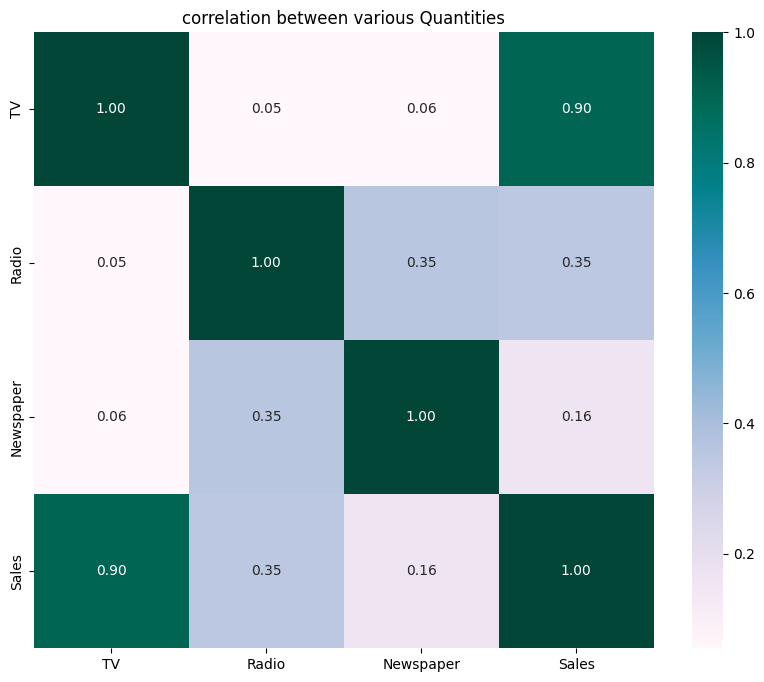

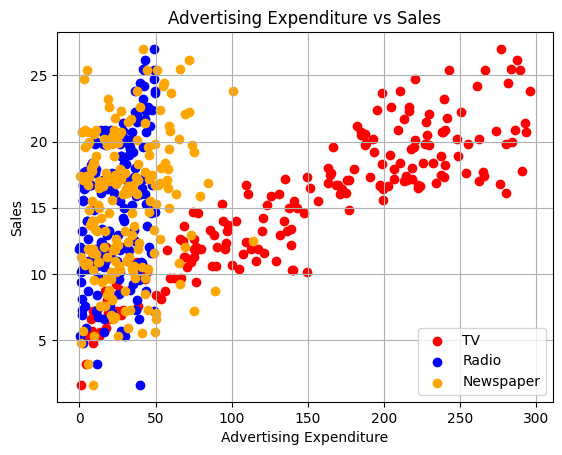

In [78]:
numeric_df=df.select_dtypes(include=['int64','float64'])
cor_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix,annot=True,cmap='PuBuGn',fmt='.2f',linecolor='black')
plt.title('correlation between various Quantities')
plt.show()
plt.scatter(df['TV'],df['Sales'],c='red',label='TV')
plt.scatter(df['Radio'],df['Sales'],c='blue',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='orange',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Advertising Expenditure vs Sales')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot and heat map tells us how the correlation between the various quantites vary. From the scatter plot it is seen that most of the points belonging to radio lie above the TV and Newspaper. So therefore with less advertising expenditure they brougt more impact.

4.	**Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.**

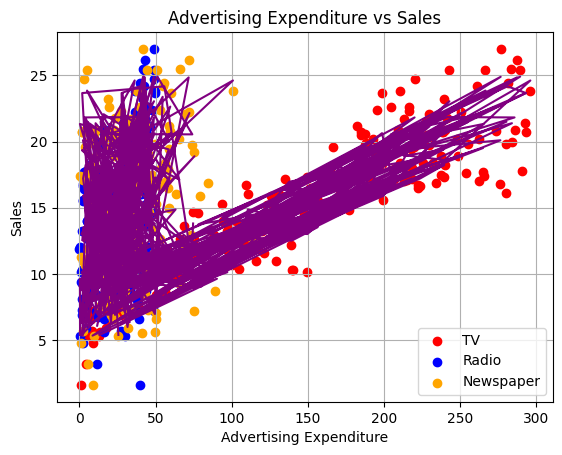

In [104]:
plt.scatter(df['TV'],df['Sales'],c='red',label='TV')
plt.scatter(df['Radio'],df['Sales'],c='blue',label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='orange',label='Newspaper')
plt.plot(x_train,model1.predict(a_train),color='purple')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Advertising Expenditure vs Sales')
plt.legend()
plt.grid(True)
plt.show()

the above graph shows the regression line for the linear regression model used

**5.	How would sales be predicted for a new set of advertising expenditures: 200 on TV, 40 on Radio, and 50 on Newspaper?**

In [83]:
p=x_test
p = np.concatenate((p,[[200,40,50]]), axis = 0)
p=sc.transform(p)
q=model1.predict(p)
print(q[-1])

19.732193695644195


The Predicted value of sales for advertising expenditures of 200 on TV 40 on Radio and 50 on newspaper is 19.73

6.	**How does the performance of the linear regression model change when the dataset is normalized?**

In [99]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("Models performance on standardised data")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
print("\nmodels performance on normalised data")
mse1 = mean_squared_error(y_test, y_pred2)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test, y_pred2)
r21 = r2_score(y_test, y_pred2)
adjusted_r2 = model1.score(x_test, y_test)

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared:", r21)
print("Adjusted R-squared:", adjusted_r2)


Models performance on standardised data
Mean Squared Error (MSE): 2.4092185773771484
Root Mean Squared Error (RMSE): 1.5521657699411968
Mean Absolute Error (MAE): 1.2754433562842968
R-squared: 0.8747286106321063

models performance on normalised data
Mean Squared Error (MSE): 13.027264118187912
Root Mean Squared Error (RMSE): 3.6093301481283078
Mean Absolute Error (MAE): 2.8824876045497976
R-squared: 0.32262539768203113
Adjusted R-squared: -42776.95544966329


The standardised model performs better than Normalised model. as the mean squared error, root mean squared error mean absolute error of standardised model has lower value than normalised model.The R-2 fit for normalised value is less than R-2 fit for standardised model.

7.	**What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?**

In [100]:
m=LinearRegression()
m.fit(c_train,y1_train)
y_pred3=m.predict(c_test)
mse2 = mean_squared_error(y1_test, y_pred3)
rmse2 = np.sqrt(mse2)
mae2= mean_absolute_error(y1_test, y_pred3)
r22 = r2_score(y1_test, y_pred3)
adjusted_r22 = m.score(c_test, y1_test)
print("models performance")
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared:", r22)
print("Adjusted R-squared:", adjusted_r22)

Mean Squared Error (MSE): 19.08256778466297
Root Mean Squared Error (RMSE): 4.368359850637647
Mean Absolute Error (MAE): 3.8687433716380952
R-squared: 0.007769655464713754
Adjusted R-squared: 0.007769655464713754


The performance of model worsens when the TV is not considered in the dataset.the R-2 fit is just 0.007 and good fit is generally greater than 0.5